In [54]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

ImportError: cannot import name 'phase'

In [55]:
from cmocean import cm

In [56]:
cm.phase

In [18]:
from IPython.display import Image

In [19]:
num=10
prefix='/home/oge1/lammps/sapphire/analysis/results/50A/atom1/fields/'
xfield = loadtxt(prefix+'xfield{:04d}0000.txt'.format(num))
yfield = loadtxt(prefix+'yfield{:04d}0000.txt'.format(num))
fieldnorm = sqrt(xfield**2+yfield**2)
unitxfield = xfield/fieldnorm
unityfield = yfield/fieldnorm

/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in true_divide
/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


In [20]:
X = linspace(1,0,xfield.shape[0])
Y = linspace(0,1,xfield.shape[1])
x,y=meshgrid(X,Y,indexing='ij')

In [21]:
from os import listdir

In [30]:
prefix = '/home/oge1/lammps/sapphire/analysis/results/50A/atom1/fields/'

In [23]:
from glob import glob

In [25]:
# Color is angle,
# Magnitude by size
def vfld(prefix,num,outloc=None):
    xfield = loadtxt(prefix+'xfield{:04d}0000.txt'.format(num))
    yfield = loadtxt(prefix+'yfield{:04d}0000.txt'.format(num))
    fieldnorm = sqrt(xfield**2+yfield**2)
    unitxfield = xfield/fieldnorm
    unityfield = yfield/fieldnorm 
    
    figure(figsize=[16,10])
    skip=15
    angle = arctan2(xfield[::-skip,::skip],yfield[::-skip,::skip])
    
    quiver(x[::skip,::skip],y[::skip,::skip],xfield[::-skip,::skip],yfield[::-skip,::skip],angle)
    if outloc != None:
        savefig(outloc)

In [57]:
# Magnitude by color
# Normalized
def vfld2(prefix,num,alpha,outloc=None):
    xfield = loadtxt(prefix+'xfield{:04d}0000.txt'.format(num))
    yfield = loadtxt(prefix+'yfield{:04d}0000.txt'.format(num))
    fieldnorm = sqrt(xfield**2+yfield**2)
    unitxfield = xfield/fieldnorm
    unityfield = yfield/fieldnorm 
    
    figure(figsize=[16,10])
    skip=15
    angle = arctan2(xfield[::-skip,::skip],yfield[::-skip,::skip])
    
    xs = x[::skip,::skip]
    ys = y[::skip,::skip]
    xfs = xfield[::-skip,::skip]
    yfs = yfield[::-skip,::skip]
    fn = fieldnorm[::skip,::skip]
    
    vx = xfs * ((xfs**2+yfs**2)**alpha/(xfs**2+yfs**2))**.5
    vy = yfs * vx / xfs
    
    quiver(xs,ys,vx,vy,angle,cmap=cm.phase)
    #quiver(x[::skip,::skip],y[::skip,::skip],xfield[::-skip,::skip],yfield[::-skip,::skip],fieldnorm[::skip,::skip])
    if outloc != None:
        savefig(outloc)

/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide
/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide
/home/oge1/.local/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in true_divide


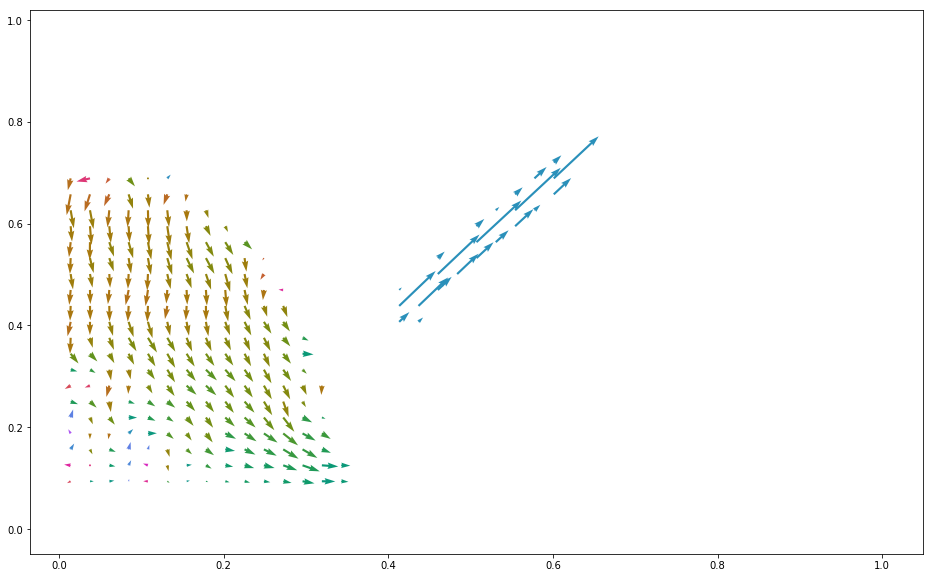

In [60]:
vfld2(prefix,num,.5)

In [52]:
quiver?

In [ ]:
for i in range(10):
    print(i)
    vfld(prefix,i,'img{:4d}.png'.format(i))

In [ ]:
figure(figsize=[16,10])
skip=15
angle = arctan2(xfield[::-skip,::skip],yfield[::-skip,::skip])
#quiver(x[::skip,::skip],y[::skip,::skip],unitxfield[::-skip,::skip],unityfield[::-skip,::skip],angle)#fieldnorm[::-skip,::skip])
quiver(x[::skip,::skip],y[::skip,::skip],xfield[::-skip,::skip],yfield[::-skip,::skip],angle)#fieldnorm[::-skip,::skip])
#quiver(unitxfield[::-skip,::skip],unityfield[::-skip,::skip],fieldnorm[::-skip,::skip])


In [ ]:
Image('fv.png')